<a href="https://colab.research.google.com/github/wanguiKuria/Online-Shopping-website/blob/master/BI_semester_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving customers.csv to customers.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving employees.csv to employees.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving offices.csv to offices.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving orderdetails.csv to orderdetails.csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving orders.csv to orders.csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving payments.csv to payments.csv


In [7]:
from google.colab import files
uploaded = files.upload()

Saving productlines.csv to productlines.csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving products.csv to products.csv


In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
customers = pd.read_csv('customers.csv')
employees = pd.read_csv('employees.csv')
offices = pd.read_csv('offices.csv')
orderdetails = pd.read_csv('orderdetails.csv')
orders = pd.read_csv('orders.csv')
payments = pd.read_csv('payments.csv')
productlines = pd.read_csv('productlines.csv')
products = pd.read_csv('products.csv')


In [12]:
order_details = pd.merge(orders, orderdetails, on='orderNumber')

In [15]:
order_customer = pd.merge(orderdetails, orders[['orderNumber', 'customerNumber']], on='orderNumber')

In [27]:
#  Total revenue ( multiply priceEach and quantityOrdered)
orderdetails['totalRevenue'] = orderdetails['priceEach'] * orderdetails['quantityOrdered']

In [17]:
# Sum of total revenue
total_revenue = orderdetails['totalRevenue'].sum()
print("Total Revenue: $", total_revenue)

Total Revenue: $ 9604190.61


In [18]:
#  revenue by orderNumber (each order)
order_revenue = orderdetails.groupby('orderNumber')['totalRevenue'].sum()

In [19]:
# Average order size
average_order_size = order_revenue.mean()
print("Average Order Size: $", average_order_size)

Average Order Size: $ 29460.707392638036


In [26]:
# Merging orderdetails with orders to get customerNumber
order_customer = pd.merge(orderdetails, orders[['orderNumber', 'customerNumber']], on='orderNumber')

In [24]:
#  Total revenue per customer
customer_revenue = order_customer.groupby('customerNumber')['totalRevenue'].sum()

In [25]:
#  Average customer spend
average_customer_spend = customer_revenue.mean()
print("Average Customer Spend: $", average_customer_spend)

Average Customer Spend: $ 98001.945


In [28]:
# Merge orderdetails with products to get product information
order_product = pd.merge(orderdetails, products[['productCode', 'productName', 'productLine']], on='productCode')

In [29]:
# Calculate total revenue per product
order_product['totalRevenue'] = order_product['priceEach'] * order_product['quantityOrdered']

In [33]:
# Group by product and sum the total revenue for each product
product_revenue = order_product.groupby('productName')['totalRevenue'].sum()

In [31]:
# Sort the products by total revenue in descending order to identify top-selling products
top_selling_products = product_revenue.sort_values(ascending=False)


In [32]:
# Display the top 10 selling products
top_10_selling_products = top_selling_products.head(10)
print("Top 10 Selling Products:\n", top_10_selling_products)

Top 10 Selling Products:
 productName
1992 Ferrari 360 Spider red             276839.98
2001 Ferrari Enzo                       190755.86
1952 Alpine Renault 1300                190017.96
2003 Harley-Davidson Eagle Drag Bike    170686.00
1968 Ford Mustang                       161531.48
1969 Ford Falcon                        152543.02
1980s Black Hawk Helicopter             144959.91
1998 Chrysler Plymouth Prowler          142530.63
1917 Grand Touring Sedan                140535.60
2002 Suzuki XREO                        135767.03
Name: totalRevenue, dtype: float64


In [34]:
# Group by product line and sum the total revenue for each product line
product_line_revenue = order_product.groupby('productLine')['totalRevenue'].sum()

In [35]:
# Sort the product lines by total revenue to compare their performance
sorted_product_line_revenue = product_line_revenue.sort_values(ascending=False)

In [36]:
# Display the product line performance
print("Product Line Revenue Performance:\n", sorted_product_line_revenue)


Product Line Revenue Performance:
 productLine
Classic Cars        3853922.49
Vintage Cars        1797559.63
Motorcycles         1121426.12
Trucks and Buses    1024113.57
Planes               954637.54
Ships                663998.34
Trains               188532.92
Name: totalRevenue, dtype: float64


In [37]:
import matplotlib.pyplot as plt

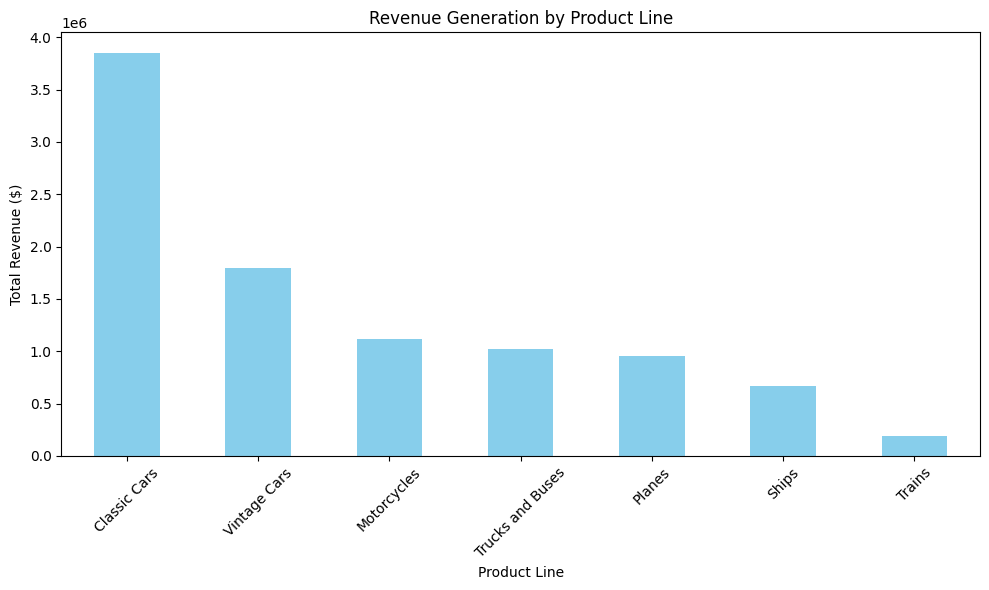

In [38]:
# Plotting product line performance
plt.figure(figsize=(10, 6))
sorted_product_line_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue Generation by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

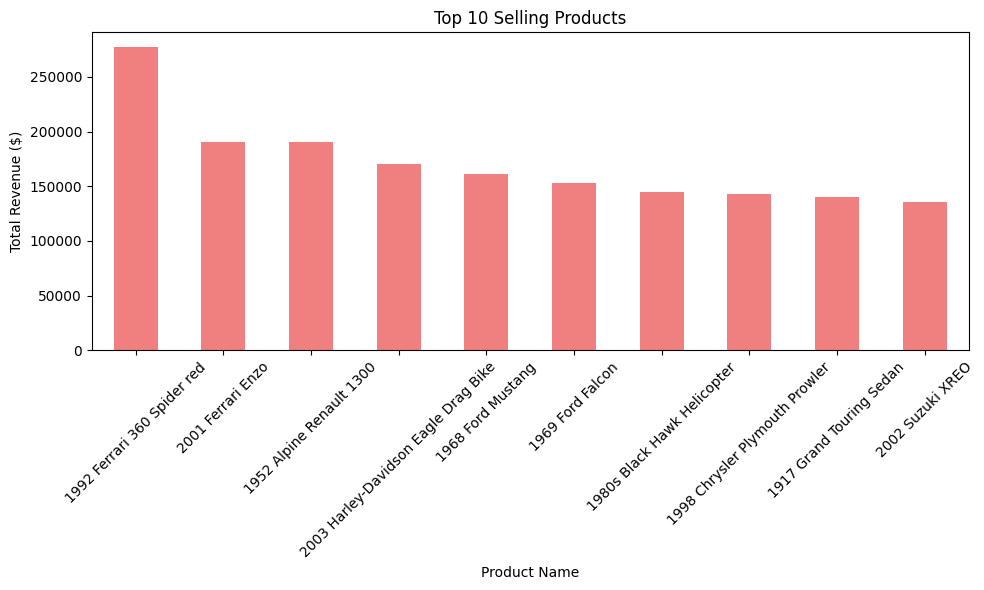

In [39]:
# Plotting top 10 selling products
plt.figure(figsize=(10, 6))
top_10_selling_products.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Count the number of orders placed by each customer
purchase_frequency = orders.groupby('customerNumber')['orderNumber'].count()

In [41]:
# Display the first few customers' purchase frequency
print(purchase_frequency.head())


customerNumber
103    3
112    3
114    5
119    4
121    4
Name: orderNumber, dtype: int64


In [42]:
# Merge orderdetails with orders to get customerNumber
order_customer = pd.merge(orderdetails, orders[['orderNumber', 'customerNumber']], on='orderNumber')

In [43]:
# Calculate total revenue per customer
customer_revenue = order_customer.groupby('customerNumber')['totalRevenue'].sum()

In [44]:
# Display the first few customers' total revenue
print(customer_revenue.head())

customerNumber
103     22314.36
112     80180.98
114    180585.07
119    158573.12
121    104224.79
Name: totalRevenue, dtype: float64


In [45]:
# Group payments by customer and sum the total amount paid by each customer
customer_payments = payments.groupby('customerNumber')['amount'].sum()

In [46]:
# Count the number of payments made by each customer
payment_frequency = payments.groupby('customerNumber')['paymentDate'].count()

In [47]:
# Display the first few customers' payment totals and frequencies
print(customer_payments.head())

customerNumber
103     22314.36
112     80180.98
114    180585.07
119    116949.68
121    104224.79
Name: amount, dtype: float64


In [48]:
print(payment_frequency.head())

customerNumber
103    3
112    3
114    4
119    3
121    4
Name: paymentDate, dtype: int64


In [49]:
# Merge customer spend and payment data
customer_profile = pd.merge(customer_revenue, customer_payments, on='customerNumber', how='left')
customer_profile = pd.merge(customer_profile, purchase_frequency, on='customerNumber', how='left')

In [50]:
# Rename the columns for easier interpretation
customer_profile.columns = ['totalSpend', 'totalPayments', 'purchaseFrequency']

In [51]:
# Define a threshold for high-value customers (e.g., customers with total spend above a certain threshold)
high_value_customers = customer_profile[customer_profile['totalSpend'] > 5000]  # Example threshold

In [52]:
# Sort high-value customers by total spend
high_value_customers = high_value_customers.sort_values(by='totalSpend', ascending=False)

In [53]:
# Display the top 10 high-value customers
print(high_value_customers.head(10))

                totalSpend  totalPayments  purchaseFrequency
customerNumber                                              
141              820689.54      715738.98                 26
124              591827.34      584188.24                 17
114              180585.07      180585.07                  5
151              177913.95      177913.95                  4
119              158573.12      116949.68                  4
148              156251.03      156251.03                  5
323              154622.08      154622.08                  5
131              149085.15      107639.94                  4
187              148410.09      148410.09                  3
450              143536.27       59551.38                  4


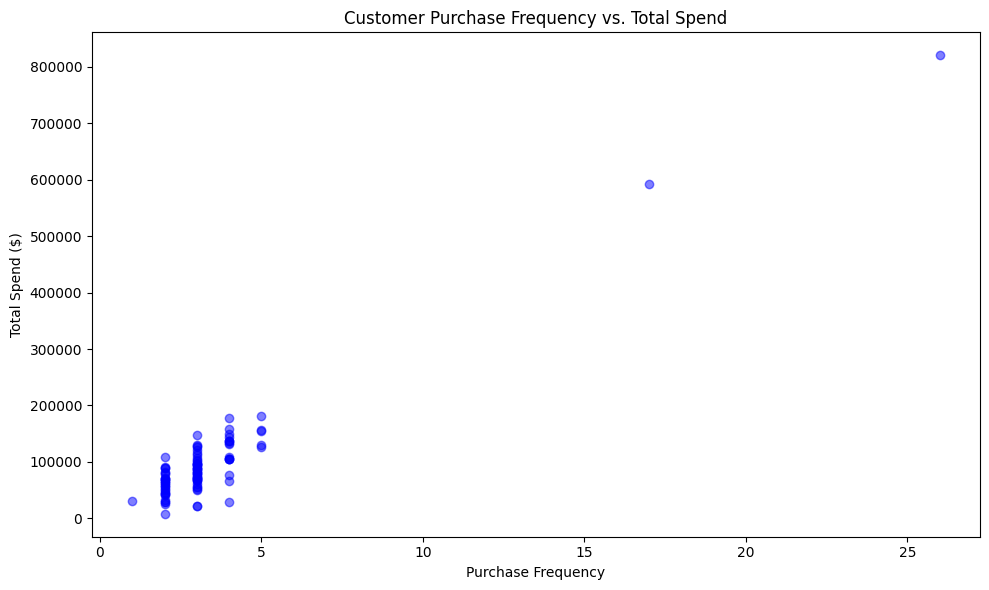

In [54]:
# Plotting total spend vs. purchase frequency for all customers
plt.figure(figsize=(10, 6))
plt.scatter(customer_profile['purchaseFrequency'], customer_profile['totalSpend'], color='blue', alpha=0.5)
plt.title('Customer Purchase Frequency vs. Total Spend')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend ($)')
plt.tight_layout()
plt.show()

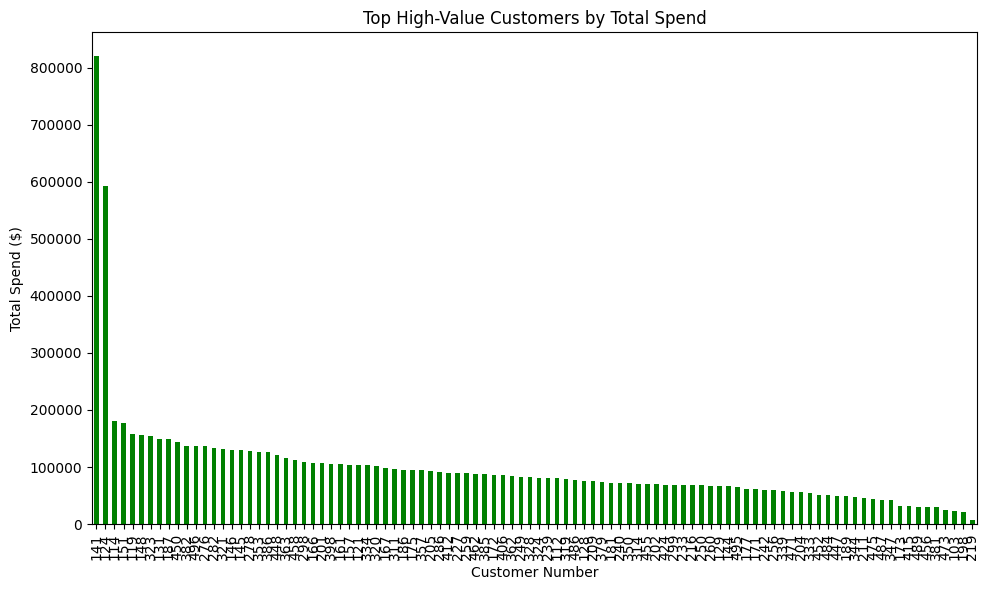

In [55]:
# Plotting high-value customers
plt.figure(figsize=(10, 6))
high_value_customers['totalSpend'].plot(kind='bar', color='green')
plt.title('Top High-Value Customers by Total Spend')
plt.xlabel('Customer Number')
plt.ylabel('Total Spend ($)')
plt.tight_layout()
plt.show()

In [56]:
# Merge orderdetails with orders to calculate the total revenue per order
order_details = pd.merge(orderdetails, orders[['orderNumber', 'orderDate']], on='orderNumber')

In [57]:
# Convert the 'orderDate' column to datetime format
order_details['orderDate'] = pd.to_datetime(order_details['orderDate'])

In [58]:
# Calculate total revenue for each order
order_details['totalRevenue'] = order_details['quantityOrdered'] * order_details['priceEach']

In [59]:
# Monthly aggregation
#Extract year and month from 'orderDate'

order_details['year_month'] = order_details['orderDate'].dt.to_period('M')

# Group by the 'year_month' and sum the total revenue for each month
monthly_revenue = order_details.groupby('year_month')['totalRevenue'].sum()

# Display monthly revenue
print(monthly_revenue)

year_month
2003-01    116692.77
2003-02    128403.64
2003-03    160517.14
2003-04    185848.59
2003-05    179435.55
2003-06    150470.77
2003-07    201940.36
2003-08    178257.11
2003-09    236697.85
2003-10    514336.21
2003-11    988025.15
2003-12    276723.25
2004-01    292385.21
2004-02    289502.84
2004-03    217691.26
2004-04    187575.77
2004-05    248325.30
2004-06    343370.74
2004-07    325563.49
2004-08    419327.09
2004-09    283799.80
2004-10    500233.86
2004-11    979291.98
2004-12    428838.17
2005-01    307737.02
2005-02    317192.17
2005-03    359711.96
2005-04    344820.62
2005-05    441474.94
Freq: M, Name: totalRevenue, dtype: float64


In [60]:
# Weekly Aggregation
#Extract year and week number from 'orderDate'
order_details['year_week'] = order_details['orderDate'].dt.to_period('W')

# Group by the 'year_week' and sum the total revenue for each week
weekly_revenue = order_details.groupby('year_week')['totalRevenue'].sum()

# Display weekly revenue
print(weekly_revenue)

year_week
2003-01-06/2003-01-12     26267.62
2003-01-27/2003-02-02     90425.15
2003-02-10/2003-02-16     53959.21
2003-02-17/2003-02-23     52151.81
2003-02-24/2003-03-02     22292.62
                           ...    
2005-05-02/2005-05-08    126203.11
2005-05-09/2005-05-15     74882.42
2005-05-16/2005-05-22     76047.51
2005-05-23/2005-05-29     49890.61
2005-05-30/2005-06-05     85380.91
Freq: W-SUN, Name: totalRevenue, Length: 114, dtype: float64


In [61]:
#Quaterly aggregation
# Extract year and quarter from 'orderDate'
order_details['year_quarter'] = order_details['orderDate'].dt.to_period('Q')

# Group by the 'year_quarter' and sum the total revenue for each quarter
quarterly_revenue = order_details.groupby('year_quarter')['totalRevenue'].sum()

# Display quarterly revenue
print(quarterly_revenue)

year_quarter
2003Q1     405613.55
2003Q2     515754.91
2003Q3     616895.32
2003Q4    1779084.61
2004Q1     799579.31
2004Q2     779271.81
2004Q3    1028690.38
2004Q4    1908364.01
2005Q1     984641.15
2005Q2     786295.56
Freq: Q-DEC, Name: totalRevenue, dtype: float64


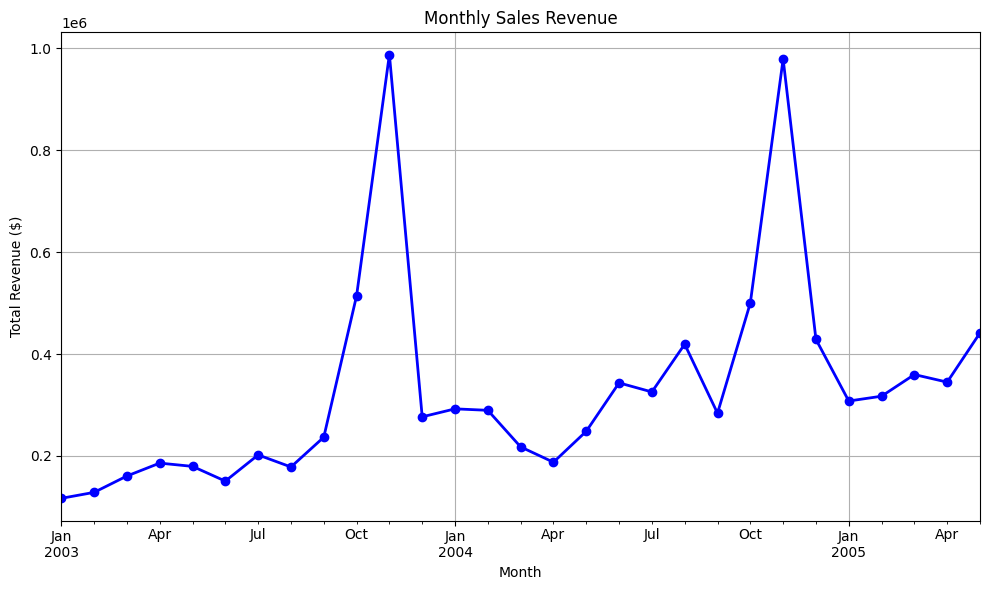

In [62]:
# Plot monthly revenue trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

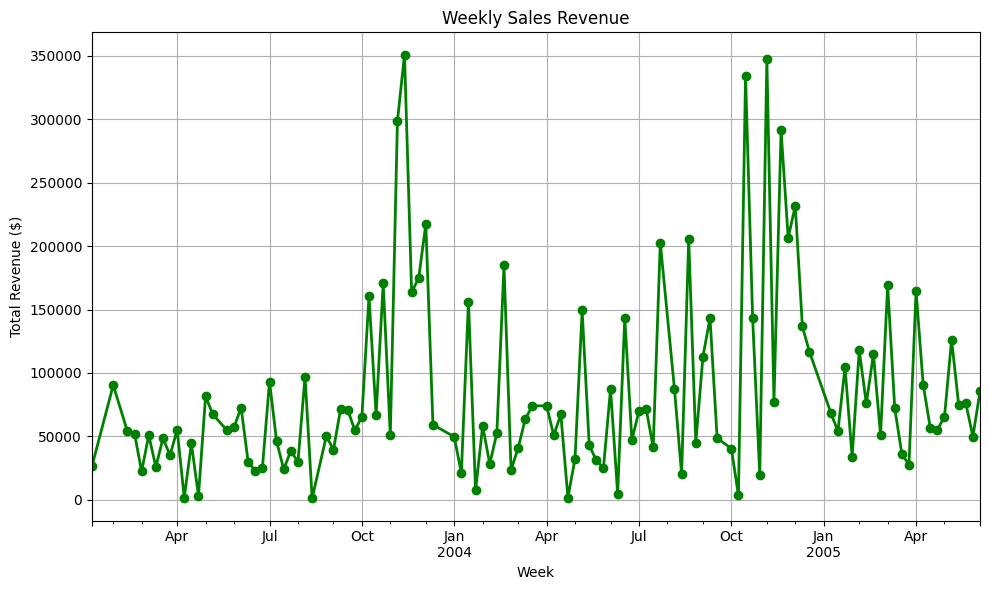

In [63]:
# Plot weekly revenue trend
plt.figure(figsize=(10, 6))
weekly_revenue.plot(kind='line', color='green', marker='o', linestyle='-', linewidth=2)
plt.title('Weekly Sales Revenue')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

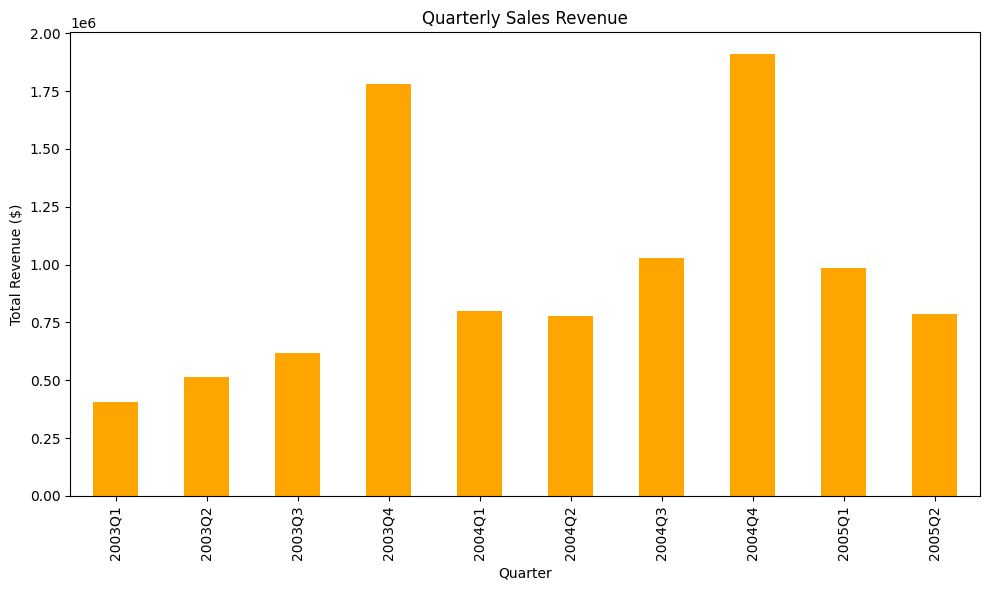

In [64]:
# Plot quarterly revenue trend
plt.figure(figsize=(10, 6))
quarterly_revenue.plot(kind='bar', color='orange')
plt.title('Quarterly Sales Revenue')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()

In [67]:
import pandas as pd



In [68]:
# Load the data
orders = pd.read_csv('orders.csv')
orderdetails = pd.read_csv('orderdetails.csv')
employees = pd.read_csv('employees.csv')
offices = pd.read_csv('offices.csv')

In [72]:
print(orders.columns)


Index(['orderNumber', 'orderDate', 'requiredDate', 'shippedDate', 'status',
       'comments', 'customerNumber'],
      dtype='object')
